In [3]:
import pandas as pd

df = pd.read_csv('bill_data.csv')

df.head()

,house_bill,senate_bill,bill_number,legislative_session,num_of_joint_authors,num_of_co_authors,num_of_subjects,passed,male_house_members,male_senate_members,...,senate_members_age_40_to_49,house_members_age_50_to_59,senate_members_age_50_to_59,house_members_age_60_to_69,house_members_age_over_70,senate_members_age_over_70,house_committee_democrats,house_committee_republicans,senate_committee_democrats,senate_committee_republicans
0,True,False,1,781,0,0,2,False,118,27,...,7,31,19,5,8,0,5,7,0,0
1,True,False,2,781,0,0,0,False,118,27,...,7,31,19,5,8,0,3,7,0,0
2,True,False,3,781,1,0,2,False,118,27,...,7,31,19,5,8,0,6,9,3,6
3,True,False,4,781,0,0,1,False,118,27,...,7,31,19,5,8,0,4,6,0,0
4,True,False,5,781,0,0,3,True,118,27,...,7,31,19,5,8,0,12,18,5,11


In [4]:
X = df.copy()
X.pop('bill_number')
X.pop('legislative_session')
X["house_bill"] = X["house_bill"].astype(int)
X["senate_bill"] = X["senate_bill"].astype(int)
X["passed"] = X["passed"].astype(int)
y = X.pop('passed')

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, train_size=0.75)
input_shape = [X_train.shape[1]]

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

# YOUR CODE HERE: define the model given in the diagram
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(.3),
    
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(.3),
    
    layers.Dense(1, activation='sigmoid'),
])

In [6]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

In [7]:
model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping]
)
model.save('./the_model')

Epoch 1/200
97/97 [==============================] - 3s 20ms/step - loss: 0.4466 - binary_accuracy: 0.8407 - val_loss: 0.3868 - val_binary_accuracy: 0.7952
Epoch 2/200
97/97 [==============================] - 2s 20ms/step - loss: 0.2825 - binary_accuracy: 0.8792 - val_loss: 0.3663 - val_binary_accuracy: 0.7931
Epoch 3/200
97/97 [==============================] - 2s 20ms/step - loss: 0.2510 - binary_accuracy: 0.8798 - val_loss: 0.2641 - val_binary_accuracy: 0.8188
Epoch 4/200
97/97 [==============================] - 2s 21ms/step - loss: 0.2381 - binary_accuracy: 0.8808 - val_loss: 0.2262 - val_binary_accuracy: 0.8822
Epoch 5/200
97/97 [==============================] - 2s 22ms/step - loss: 0.2274 - binary_accuracy: 0.8853 - val_loss: 0.2120 - val_binary_accuracy: 0.8940
Epoch 6/200
97/97 [==============================] - 2s 20ms/step - loss: 0.2240 - binary_accuracy: 0.8854 - val_loss: 0.2079 - val_binary_accuracy: 0.8951
Epoch 7/200
97/97 [==============================] - 2s 18ms/ste

In [8]:
import pandas as pd
testDF = pd.read_csv('bill_data.csv')
T = testDF.copy()
T["house_bill"] = T["house_bill"].astype(int)
T["senate_bill"] = T["senate_bill"].astype(int)
T["passed"] = T["passed"].astype(int)

#legislative_session = "82R" #senate bil 1226
T = T.loc[(T['legislative_session'] == "82R") & (T['house_bill'] == 1) & (T['bill_number'] == 472)]
T.pop('bill_number')
T.pop('legislative_session')
T.pop('passed')

yhat = model.predict(T)
print(yhat)


1/1 [==============================] - 0s 177ms/step
[[0.0021317]]


515/515 [==============================] - 1s 1ms/step


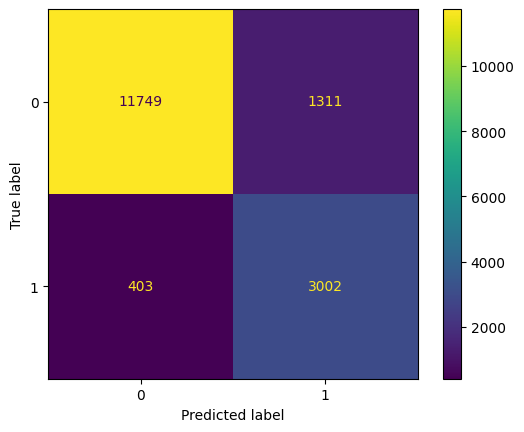

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = model.predict(X_valid)
y_pred = [1 if i > .5 else 0 for i in y_pred]
cm = confusion_matrix(y_valid, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
